In [ ]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.chdir(os.path.join(os.getcwd(), 'drive', 'My Drive', 'Archway Health'))
os.listdir()

['Analytics_Project.pdf', 'data.xlsx', 'total_data.xlsx', 'data.ipynb']

In [ ]:
data = pd.ExcelFile('total_data.xlsx')


In [ ]:
data.sheet_names

['2018_dict',
 '2018_data',
 '2017_dict',
 '2017_data',
 '2016_dict',
 '2016_data',
 '2015_dict',
 '2015_data',
 '2014_dict',
 '2014_data',
 '2013_dict',
 '2013_data']

In [ ]:
dict_2018 = pd.read_excel(data, 0)
data_2018 = pd.read_excel(data, 1)
dict_2017 = pd.read_excel(data, 2)
data_2017 = pd.read_excel(data, 3)
dict_2016 = pd.read_excel(data, 4)
data_2016 = pd.read_excel(data, 5)
dict_2015 = pd.read_excel(data, 6)
data_2015 = pd.read_excel(data, 7)
dict_2014 = pd.read_excel(data, 8)
data_2014 = pd.read_excel(data, 9)
dict_2013 = pd.read_excel(data, 10)
data_2013 = pd.read_excel(data, 11)
data_2014.rename(columns={'capann_opd':'CapAnn_OPD',
                          'capann_pb':'CapAnn_PB'},inplace = True)

In [ ]:
dict_list = [dict_2018,dict_2017,dict_2016,dict_2015,dict_2014,dict_2013]
data_list = [data_2018,data_2017,data_2016,data_2015,data_2014,data_2013]

In [ ]:
for i in dict_list:
  print(i.columns)

##['Variable ', 'Short Description', 'Long Description', 'Format/Values','More information available at:']

In [ ]:
vb bdef check_col_reference(year, ref):
  pd.set_option('display.max_colwidth',None)
  year_dict = {'2018':dict_2018,
               '2017':dict_2017,
               '2016':dict_2016, 
               '2015':dict_2015,
               '2014':dict_2014,
               '2013':dict_2013
               }
  data_dict = year_dict[str(year)]
  return data_dict[data_dict['Variable ']==ref]['Long Description']


In [ ]:
print(check_col_reference(2018, 'Rev_Exp_Cat'))

41    If ACO participant total Medicare Part A and Part B FFS revenue is less than 35% of the total Medicare Parts A and B FFS expenditures for the ACO’s assigned beneficiaries, “Low Revenue”. If ACO participant total Medicare Part A and Part B FFS revenue is 35% or more of the total Medicare Parts A and B FFS expenditures for the ACO’s assigned beneficiaries, “High Revenue”. 
Name: Long Description, dtype: object


In [ ]:
data_2013.head()

,ACO_Num,ACO_NAME,Start_Date,Track2,Adv_Pay,Int_Pmt,Adv_Pay_Amt,QualScore,QualPerfShare,FinalShareRate,MinLossPerc,MinSavPerc,ABtotBnchmk,ABtotExp,BnchmkMinExp,EarnShrSavings,OweLosses,N_AB,N_AB_Year,N_AB_Year_ESRD,N_AB_Year_DIS,N_AB_Year_AGED_Dual,N_AB_Year_AGED_NonDual,N_Ben_Age_0_64,N_Ben_Age_65_74,N_Ben_Age_75_84,N_Ben_Age_85plus,N_Ben_Female,N_Ben_Male,N_Ben_Race_White,N_Ben_Race_Black,N_Ben_Race_Asian,N_Ben_Race_Hisp,N_Ben_Race_Native,N_Ben_Race_Other,Per_Capita_Exp_ALL_ESRD,Per_Capita_Exp_ALL_DIS,Per_Capita_Exp_ALL_AGDU,Per_Capita_Exp_ALL_AGND,CapAnn_INP_All,...,copd_adm,pneu_adm,readm_Rate_1000,prov_Rate_1000,P_SNF_ADM,P_EDV_Vis,P_EDV_Vis_HOSP,P_CT_VIS,P_MRI_VIS,P_EM_Total,P_EM_PCP_Vis,P_EM_SP_Vis,P_Nurse_Vis,P_FQHC_RHC_Vis,N_CAH,N_FQHC,N_RHC,N_ETA,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS,CMS_HCC_RiskScore_ESRD_BY1,CMS_HCC_RiskScore_DIS_BY1,CMS_HCC_RiskScore_AGDU_BY1,CMS_HCC_RiskScore_AGND_BY1,CMS_HCC_RiskScore_ESRD_BY2,CMS_HCC_RiskScore_DIS_BY2,CMS_HCC_RiskScore_AGDU_BY2,CMS_HCC_RiskScore_AGND_BY2,CMS_HCC_RiskScore_ESRD_BY3,CMS_HCC_RiskScore_DIS_BY3,CMS_HCC_RiskScore_AGDU_BY3,CMS_HCC_RiskScore_AGND_BY3,CMS_HCC_RiskScore_ESRD_PY,CMS_HCC_RiskScore_DIS_PY,CMS_HCC_RiskScore_AGDU_PY,CMS_HCC_RiskScore_AGND_PY
0,A67373,"Palm Beach Accountable Care Organization, LLC",2012-07-01,0,0,0.0,NaN,1,0.5,0.5,NaN,0.023373,6.130849e+08,5.735160e+08,3.956883e+07,1.938873e+07,NaN,36268,29883.833330,305.750000,2127.916667,1378.500000,26071.666670,3178,11716,10013,5897,17789,13015,27497,2080,185,554,12,476,82799.14336,13120.674760,15800.900720,11745.786900,3156.304798,...,9.269226,8.800745,164.373717,797.330595,96.774733,662.799842,268.205217,878.334440,405.637385,14776.18333,5253.676737,8814.096808,698.069748,10.340039,0,0,0,0,0,118,167,44,0,0,1.075728,1.293688,1.086807,1.211797,1.034869,1.311343,1.113807,1.229291,1.048888,1.297514,1.132787,1.229120,1.043976,1.304746,1.094837,1.212689
1,A38665,"Chinese Community Accountable Care Organization, Inc.",2012-04-01,0,0,1.0,NaN,1,0.5,0.5,NaN,0.027700,1.925138e+08,1.890647e+08,3.449181e+06,0.000000e+00,NaN,13833,11344.250000,154.416667,789.416667,8256.000000,2144.416667,1129,4160,4393,1957,7067,4572,834,234,8922,102,2,1545,73702.15890,9429.759354,8563.439329,9711.354768,2514.033541,...,7.492783,8.197986,150.966680,831.345125,42.841087,318.399189,172.598453,545.474580,274.500297,15622.09930,9401.238513,6059.281134,122.352734,39.226921,0,0,0,0,0,91,164,15,0,0,1.045317,1.171321,0.880508,1.136599,1.017387,1.205017,0.862573,1.206103,1.027216,1.150873,0.881515,1.218909,0.987706,1.132168,0.899801,1.201791
2,A64796,Summit Health Solutions,2012-07-01,0,0,1.0,NaN,1,0.5,0.5,NaN,0.022940,4.230183e+08,4.322056e+08,-9.187355e+06,0.000000e+00,NaN,40595,36254.000000,232.833333,3974.333333,1113.333333,30933.500000,5508,16680,10728,4420,21051,16285,35819,978,72,32,21,414,68343.36183,7552.378392,13412.867420,7465.685547,2222.711177,...,6.564793,11.860760,130.616074,792.869801,75.715783,624.565565,192.033983,678.794064,257.130248,10056.24207,4590.886523,4042.809069,1406.217245,16.329233,0,0,0,0,11,255,200,140,2,1,1.029811,1.081841,1.016175,0.965582,1.054838,1.049890,1.046125,0.971013,1.032752,1.048791,1.088708,0.966634,1.005643,1.068674,1.096389,0.986912
3,A84830,"South Florida Accountable Care Organization,LLC",2013-01-01,0,0,NaN,NaN,1,0.5,0.5,NaN,0.035700,1.139370e+08,1.082621e+08,5.674936e+06,2.780719e+06,NaN,6150,5958.166667,111.250000,683.500000,1724.333333,3439.083333,903,2195,2007,1045,3636,2514,4342,471,30,1191,5,111,84785.70076,16360.819210,22528.317270,14190.038690,5811.681523,...,33.399536,14.769644,195.585530,761.496015,169.850905,964.222776,470.111052,1098.156592,426.641305,13112.59056,5543.483734,6996.111779,544.630619,28.364430,0,0,0,0,0,37,45,3,0,0,0.992985,1.496701,1.260627,1.249207,1.039877,1.591469,1.281565,1.286970,1.027924,1.562665,1.290685,1.332056,1.074089,1.541274,1.261080,1.379420
4,A76261,"Hackensack Physician-Hospital Alliance ACO, LLC",2012-04-01,0,0,0.0,NaN,1,0.5,0.5,NaN,0.026447,2.794693

In [ ]:
data_2018.head()

,ACO_ID,ACO_Name,ACO_State,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Initial_Track_1,Initial_Track_2,Initial_Track_3,Initial_Track_1_Plus,Current_Start_Date,Current_Track_1,Current_Track_2,Current_Track_3,Current_Track_1_Plus,Adv_Pay,AIM,SNF_Waiver,N_AB,Sav_rate,MinSavPerc,BnchmkMinExp,GenSaveLoss,DisAdj,EarnSaveLoss,DisAffQual,Met_QPS,QualScore,RecvdMean,Prior_Sav_Adj,RegTrndUpdt,PosRegAdj,UpdatedBnchmk,HistBnchmk,ABtotBnchmk,ABtotExp,Adv_Pay_Amt,Adv_Pay_Recoup,QualPerfShare,FinalShareRate,...,N_ETA,N_Hosp,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34,ACO8,ACO35,ACO36,ACO37,ACO38,ACO44,ACO43,ACO11,ACO12,ACO13,ACO14,ACO15,ACO16,ACO17,ACO18,ACO19,ACO20,ACO42,ACO40,DM_Comp,ACO27,ACO41,ACO28,ACO30
0,A1001,"Palm Beach Accountable Care Organization, LLC",FL,Renewal,2,2012-07-01,1,0,0,0,2016-01-01,1,0,0,0,0,0,0,77372,0.104912,0.020000,112523299,112523299,NaN,50087988,0,1,0.9084,0,269.0,0,NaN,14182,13678,1072551536,960028237,NaN,NaN,0.5,0.4542,...,0,0,0,442,750,216,92,0,88.33,92.18,90.93,83.54,64.51,60.15,75.18,23.39,15.76,19.71,31.48,70.97,52.75,65.31,1.74,99.71,96.77,92.88,90.1,85.17,95.45,92.86,90.07,90.27,90.8,90.52,22.95,76.89,7.17,80.48,83.21,94.35
1,A1002,CCACO,"NY, NJ",Renewal,2,2012-04-01,1,0,0,0,2016-01-01,1,0,0,0,0,0,0,9139,0.132427,0.030861,12171874,12171874,NaN,5071450,0,1,0.8503,0,190.0,0,NaN,10299,9294,91914080,79742206,NaN,NaN,0.5,0.4252,...,0,0,0,108,191,21,20,0,86.84,90.76,91.00,80.99,53.24,59.30,68.71,30.22,14.78,18.53,21.31,54.36,34.88,100.00,1.21,96.15,99.17,75.24,76.67,69.27,92.66,94.12,62.42,59.97,50.66,78.82,0,29.32,9.08,30.72,75.22,77.53
2,A1006,Hackensack Alliance ACO,"NJ, NY",Renewal,2,2012-04-01,1,0,0,0,2016-01-01,1,0,0,0,0,0,0,38660,0.101345,0.023134,49345826,49345826,NaN,21607983,0,1,0.8937,0,266.0,0,NaN,12868,12291,486907951,437562125,NaN,NaN,0.5,0.4468,...,0,1,3,483,581,218,101,5,85.22,93.76,93.44,80.04,63.29,61.56,73.40,26.20,15.53,20.14,35.34,77.40,56.57,72.00,1.85,99.51,91.61,90.91,83.22,76.21,78.27,94.74,83.39,70.65,74.81,83.36,12.31,45.28,13.52,51.26,74.79,89.44
3,A1021,NH Accountable Care Partners,"NH, ME, MA",Renewal,2,2012-07-01,1,0,0,0,2016-01-01,1,0,0,0,0,0,0,54981,-0.000812,0.021004,-474368,0,NaN,0,0,1,0.8752,0,0.0,0,NaN,10871,10166,584288298,584762666,NaN,NaN,0.5,0.4376,...,0,6,6,1043,1596,664,406,3,85.18,93.57,90.86,78.79,65.42,70.91,74.83,22.16,15.10,18.56,39.41,82.64,60.85,64.23,2.02,99.69,86.01,84.01,71.58,91.43,68.15,66.67,73.37,79.69,81.25,85.53,2.74,55.28,8.29,59.05,71.5,95.06
4,A1023,"Arizona Connected Care, LLC",AZ,Renewal,2,2012-04-01,1,0,0,0,2016-01-01,1,0,0,0,0,0,0,9817,0.012312,0.030182,1138279,0,NaN,0,0,1,0.8585,0,0.0,0,NaN,9634,9121,92451634,91313355,NaN,NaN,0.5,0.4292,...,0,0,0,258,87,171,9,0,82.15,93.15,91.20,77.58,57.09,59.46,72.61,18.76,15.14,18.53,33.90,66.68,54.47,60.00,2.16,92.02,74.28,73.83,70.52,79.87,79.21,78.26,81.05,60.2,73.14,72.67,1.33,41.88,19,50.37,71.89,81.16


Need to provide analysis around determining the size of risk being shifted towards providers.

In [ ]:
 # evaluate ACO performance
 # check minimum savings rate change, total expenditure change (if possible, see expenditure by disease)
 # check number of beneficiaries change 
 """
year wise:
  find the correlation of a ACO risk score with number of beneficiary
  ACO+number attributes not needed
  it's hard to do year wise. ACO_ID in 2018 different than the rest. 
  but can do a subtotal for saving/loss in the entire year to see how much dollar earned/lost.
  By this, can calculate size of the risk to lose money if enter shared savings program
 """
"""
Historical experience:
  this can be evaluated by taking the benchmark year expenditure, and compare it with actual expenditures in the performance years.
  If this is a growth in cost, meaning the program is not efficient.
  but if there is a decline in growth of cost, the program is working. 
"""



# Determine the size of risk being shifted.

In [ ]:
risk_col = ['N_AB','Sav_rate', 'BnchmkMinExp','EarnSaveLoss', 'UpdatedBnchmk','MinSavPerc',
            'HistBnchmk', 'ABtotBnchmk', 'ABtotExp', 'Per_Capita_Exp_TOTAL_PY', 'CapAnn_INP_All',
            'CapAnn_OPD','CapAnn_PB']
risk_13_col = ['BnchmkMinExp','N_AB',
               'ABtotBnchmk', 'ABtotExp','MinSavPerc', 'CapAnn_INP_All',
               'CapAnn_PB']

risk_2018 = data_2018[risk_col]
risk_2017 = data_2017[risk_col]
risk_2016 = data_2016[risk_col]
risk_2015 = data_2015[risk_col]
risk_2014 = data_2014[risk_col]
risk_2013 = data_2013[risk_13_col]


In [ ]:
df_list = [risk_2013,risk_2014,risk_2015,risk_2016,risk_2017,risk_2018]

In [ ]:
print(check_col_reference(2018, 'EarnSaveLoss'))

24    Total earned shared savings: The ACO’s share of savings for ACOs whose savings rate equaled or exceeded their MSR, and who were eligible for a performance payment because they met the program’s quality performance standard. This amount accounts for the application of the ACO’s final sharing rate based on quality performance (not to exceed 50% under Track 1 and the Track 1+ Model, 60% under Track 2, or 75% for Track 3), as well as the reduction in performance payment due to sequestration and application of the performance payment limit. This amount does not account for repayment of advance payments. Total earned shared losses: The ACO’s share of losses for ACOs in Track 2, Track 3, or the Track 1+ Model whose losses rate equaled or exceeded their MLR, which is the negative of the MSR chosen. This amount accounts for the application of the ACO’s final loss sharing rate (which is based on quality performance for Track 2 and 3 ACOs and does not exceed 60% for Track 2 ACOs or 75% for 

In [ ]:
"""
To determine how much ACO lost/save in 2018, we use EarnSaveLoss to calculate how ACO are performing in this year.
Extract ACOs with 0 in EarnSaveLoss, check to see how much they lose or earn.
"""

'\nTo determine how much ACO lost/save in 2018, we use EarnSaveLoss to calculate how ACO are performing in this year.\nExtract ACOs with 0 in EarnSaveLoss, check to see how much they lose or earn.\n'

In [ ]:
print(check_col_reference(2018, 'BnchmkMinExp'))

21    Total Benchmark Expenditures Minus Assigned Beneficiary Expenditures. If positive, represents total savings. If negative, represents total losses.
Name: Long Description, dtype: object


In [ ]:
# saving/loss per beneficiary in each year
save_2013 = round((risk_2013['BnchmkMinExp']/risk_2013['N_AB']).sum(),2)
save_2014 = round((risk_2014['BnchmkMinExp']/risk_2014['N_AB']).sum(),2)
save_2015 = round((risk_2015['BnchmkMinExp']/risk_2015['N_AB']).sum(),2)
save_2016 = round((risk_2016['BnchmkMinExp']/risk_2016['N_AB']).sum(),2)
save_2017 = round((risk_2017['BnchmkMinExp']/risk_2017['N_AB']).sum(),2)
save_2018 = round((risk_2018['BnchmkMinExp']/risk_2018['N_AB']).sum(),2)



In [ ]:
pdf = risk_2013[risk_2013.BnchmkMinExp>0]
print((pdf['BnchmkMinExp']/pdf['N_AB']).sum())

60733.98306322933


In [ ]:
# divide by positve and negative
save_list = [[],[]]
positive_save, negative_loss = 0, 0
for i in df_list:
    positive = i[i['BnchmkMinExp']>0]
    negative = i[i['BnchmkMinExp']<0]
    positive_save = round((positive['BnchmkMinExp']/positive['N_AB']).sum(), 2)
    negative_loss =round((negative['BnchmkMinExp']/negative['N_AB']).sum(), 2)
    save_list[0].append(positive_save)
    save_list[1].append(negative_loss)




In [ ]:
save_list

[[60733.98, 80048.47, 112249.5, 122635.87, 133797.3, 157430.92],
 [-44283.05, -52346.58, -72565.82, -66759.52, -61026.46, -55186.95]]

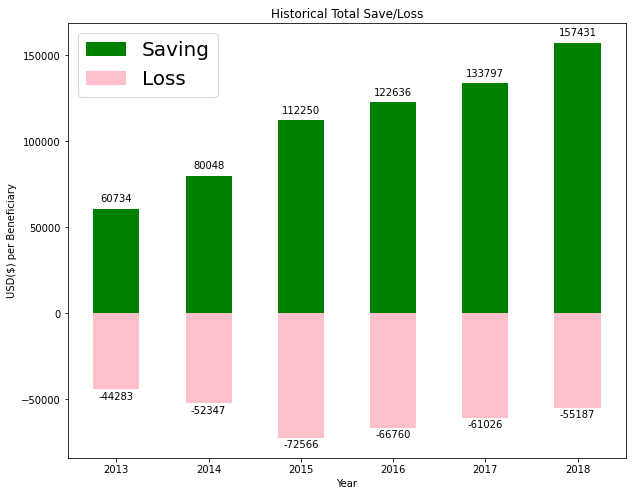

In [ ]:
x_val = range(2013, 2019)
plt.figure(figsize=(10,8))
plt.bar(x_val, save_list[0], width=0.5,color='g')
plt.bar(x_val, save_list[1], width=0.5,color='pink')
plt.title('Historical Total Save/Loss')
plt.xlabel('Year')
plt.ylabel('USD($) per Beneficiary')
plt.legend(['Saving', 'Loss'], prop={'size': 20})
for x,y in zip(x_val, save_list[0]):
  label = '{:.0f}'.format(y)
  plt.annotate(label, (x,y), textcoords='offset points',xytext=(0,7),ha='center')
for x,y in zip(x_val, save_list[1]):
  label = '{:.0f}'.format(y)
  plt.annotate(label, (x,y), textcoords='offset points',xytext=(0,-10),ha='center')

0     16450.93
1     27701.89
2     39683.68
3     55876.35
4     72770.84
5    102243.97
dtype: float64


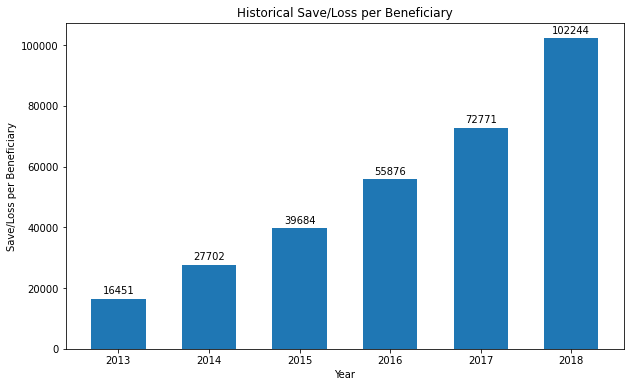

In [ ]:
save_per_ben_list = pd.Series([save_2013,save_2014,save_2015,save_2016,save_2017,save_2018])
print(save_per_ben_list)
x_val = range(2013,2019)
plt.figure(figsize=(10,6))
plt.bar(x_val, save_per_ben_list, width=0.6)
plt.xlabel('Year')
plt.ylabel('Save/Loss per Beneficiary')
plt.title('Historical Save/Loss per Beneficiary')
for x,y in zip(x_val, save_per_ben_list):
  label = "{:.0f}".format(y)
  plt.annotate(label, (x,y), textcoords='offset points',xytext=(0,5),ha='center')

In [ ]:
#number of ACOs which cost more in each year
aco_save_loss_dict = dict()
year = 2013
for df in df_list:
    num = len(df.index)
    loss = df[df['BnchmkMinExp']<=0].count().tolist()[0]
    saving_rate = round(1 - loss/num,2)
    aco_save_loss_dict[year] = saving_rate
    year+=1

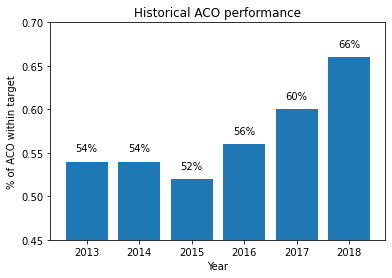

In [ ]:
# plot saving rate with year
# plt.figure(figsize=(10,8))
plt.bar(aco_save_loss_dict.keys(),aco_save_loss_dict.values())
plt.ylim(0.45,0.7)
plt.ylabel('% of ACO within target')
plt.xlabel('Year')
plt.title('Historical ACO performance')
for x,y in aco_save_loss_dict.items():
  label = str(int(y*100))+'%'
  plt.annotate(label,(x,y), textcoords='offset points', xytext=(0,10),ha='center')


In [ ]:
data_2018.groupby('Rev_Exp_Cat').count()


,ACO_ID,ACO_Name,ACO_State,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Initial_Track_1,Initial_Track_2,Initial_Track_3,Initial_Track_1_Plus,Current_Start_Date,Current_Track_1,Current_Track_2,Current_Track_3,Current_Track_1_Plus,Adv_Pay,AIM,SNF_Waiver,N_AB,Sav_rate,MinSavPerc,BnchmkMinExp,GenSaveLoss,DisAdj,EarnSaveLoss,DisAffQual,Met_QPS,QualScore,RecvdMean,Prior_Sav_Adj,RegTrndUpdt,PosRegAdj,UpdatedBnchmk,HistBnchmk,ABtotBnchmk,ABtotExp,Adv_Pay_Amt,Adv_Pay_Recoup,QualPerfShare,FinalShareRate,...,N_ETA,N_Hosp,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34,ACO8,ACO35,ACO36,ACO37,ACO38,ACO44,ACO43,ACO11,ACO12,ACO13,ACO14,ACO15,ACO16,ACO17,ACO18,ACO19,ACO20,ACO42,ACO40,DM_Comp,ACO27,ACO41,ACO28,ACO30
Rev_Exp_Cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High Revenue,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,8,313,313,313,313,313,56,313,77,313,313,313,313,26,26,313,313,...,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,311,313,313,313,313,313,313,313,313,313,309,313,313,313,313,313
Low Revenue,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,3,235,235,235,235,235,51,235,59,235,235,235,235,34,34,235,235,...,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,227,235,235,235,235,235,235,234,234,235,233,235,235,235,233,235


In [ ]:
# number of patients year over year
ben_list = []
for i in df_list:
    N = i['N_AB'].sum()
    ben_list.append(N)



In [ ]:
ben_list
"""
[3675263, 5329831, 7270233, 7884058, 8992886, 10096874]
by this large number in beneficiaries, I believe it's safe to say that the data is normally distributed from 2013.
assume data is normally distributed, the probability of ACO generating a total loss in one performance year is XXXX.
use this to create a fit regression to predict the probability of loss in the next performance year. 
And also use the BnchmkMinExp to see estimate the size 


"""


[3675263, 5329831, 7270233, 7884058, 8992886, 10096874]

In [ ]:
plt.scatter(range(2013,2019), ben_list)


In [ ]:
"""
to evaluate the historical experience of the program
first provide some simple charts to how ACO has increased over time, how many patients has been treated over time, and overall how much money has been saved by one patient received over time.

More indepth analysis:
can use PCA to determine useful features and find out depending on what features the ACO is expected to lose when a patient is treated. 



"""


In [ ]:
# people analytics
people_col =['N_PCP', 'N_Spec', 'N_NP', 'N_PA', 'N_CNS']
people_2018 = data_2018[people_col]
people_2017 = data_2017[people_col]
people_2016 = data_2016[people_col]
people_2015 = data_2015[people_col]
people_2014 = data_2014[people_col]
people_2013 = data_2013[people_col]
  

In [ ]:
people_list = [people_2013,people_2014,people_2015,people_2016,people_2017,people_2018]

In [ ]:
people_2014.N_PCP.sum()

42612

In [ ]:
print(check_col_reference(2018, 'N_PCP'))
print(check_col_reference(2018, 'N_Spec'))
print(check_col_reference(2018, 'N_NP'))
print(check_col_reference(2018, 'N_PA'))
print(check_col_reference(2018, 'N_CNS'))


135    Total number of PCPs that reassigned billing rights to an ACO participant in the performance year. Based on the ACO's certified participant list used in financial reconciliation and information in the PECOS.
Name: Long Description, dtype: object
136    Total number of physician specialists that reassigned billing rights to an ACO participant in the performance year. Based on the ACO's certified participant list used in financial reconciliation and information in the PECOS.
Name: Long Description, dtype: object
137    Total number of nurse practitioners that reassigned billing rights to an ACO participant in the performance year. Based on the ACO's certified participant list used in financial reconciliation and information in the PECOS.
Name: Long Description, dtype: object
138    Total number of physician assistants that reassigned billing rights to an ACO participant in the performance year. Based on the ACO's certified participant list used in financial reconciliation and info

In [ ]:
PCP_list, Spec_list, NP_list, PA_list, CNS_list = [],[],[],[],[]
for i in people_list:
  PCP = i['N_PCP'].sum()
  Spec = i['N_Spec'].sum()
  NP = i['N_NP'].sum()
  PA = i['N_PA'].sum()
  CNS = i['N_CNS'].sum()

  PCP_list.append(PCP)
  Spec_list.append(Spec)
  NP_list.append(NP)
  PA_list.append(PA)
  CNS_list.append(CNS)

PCP_list=pd.Series(PCP_list)
Spec_list=pd.Series(Spec_list)
NP_list=pd.Series(NP_list)
PA_list=pd.Series(PA_list)
CNS_list=pd.Series(CNS_list)
total_people_list = PCP_list+Spec_list+NP_list+PA_list

In [ ]:
PA_list

[251, 336, 573, 457, 41596, 49593]

In [ ]:
PCP_list

[31497, 42612, 60634, 74599, 111977, 137327]

array([5610303, 5621418, 5639440, 5653405, 5690783, 5716133])

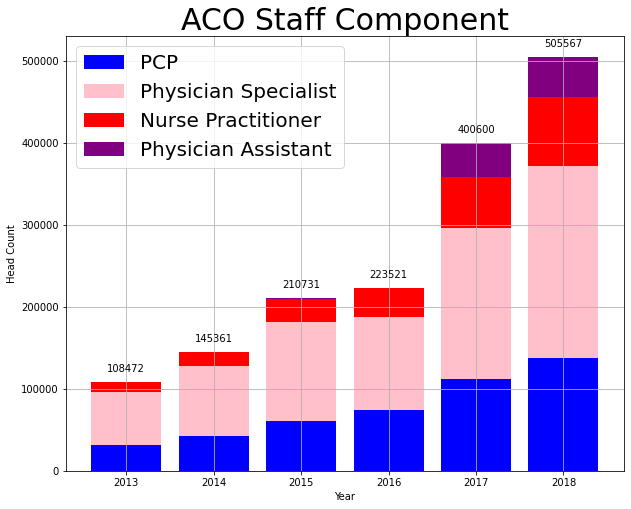

In [ ]:
plt.figure(figsize=(10,8))
plt.title('ACO Staff Component', fontsize=30)
plt.bar(x_val, PCP_list, color = 'blue')
plt.bar(x_val, Spec_list, bottom=PCP_list, color = 'pink')
plt.bar(x_val, NP_list, bottom=Spec_list+PCP_list, color = 'red')
plt.bar(x_val, PA_list, bottom=NP_list+Spec_list+PCP_list, color = 'purple')
plt.xlabel('Year')
plt.ylabel('Head Count')
plt.grid()
plt.legend(['PCP', 'Physician Specialist', 'Nurse Practitioner', 'Physician Assistant'], prop={"size": 20})
for x,y in zip(x_val, total_people_list):
  label = y
  plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10),ha='center')


In [ ]:
AB_list = []
for i in data_list:
  AB = i['N_AB'].sum()
  AB_list.append(AB)
AB_list.reverse()

In [ ]:
AB_list

[3675263, 5329831, 7270233, 7884058, 8992886, 10096874]

Text(0.5, 0, 'Year')

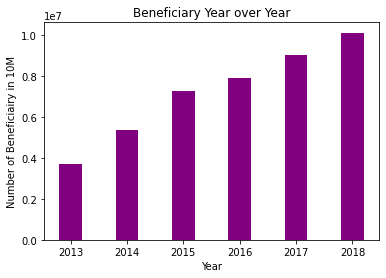

In [ ]:
plt.bar(x_val, AB_list, width = 0.4, color=['purple'])
plt.title('Beneficiary Year over Year')
plt.ylabel('Number of Beneficiairy in 10M')
plt.xlabel('Year')

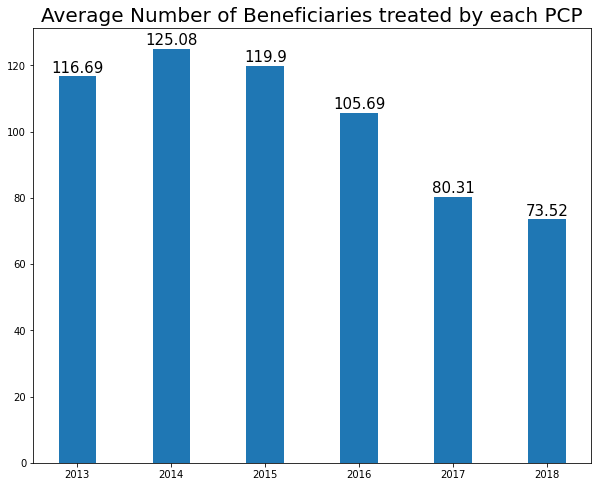

In [ ]:
# patient per PCP
B_per_PCP = AB_list/PCP_list
plt.figure(figsize=(10,8))
plt.title('Average Number of Beneficiaries treated by each PCP', fontsize=20)
plt.bar(x_val, B_per_PCP, width = 0.4)
plt.ylabel()
for x,y in zip(x_val, B_per_PCP):
  label= round(y,2)
  plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,4),ha='center', fontsize=15)


In [ ]:
# rev_exp_cat: low revenue and high revenue
rev_col = ['Rev_Exp_Cat', 'BnchmkMinExp','Per_Capita_Exp_TOTAL_PY', 'ABtotBnchmk','N_AB_Year_PY']

rev_2018 = data_2018[rev_col]

In [ ]:
high_2018 = rev_2018[rev_2018['Rev_Exp_Cat']=='High Revenue']
low_2018 = rev_2018[rev_2018['Rev_Exp_Cat']=='Low Revenue']


